In [1]:
from generate_paths import get_all_files
import six.moves.cPickle as pickle
import numpy as np
import copy
from joblib import Parallel, delayed

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from matplotlib import cm
from scipy.stats import gaussian_kde
from scatter_plot import scatter_dense

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [4]:
from hmmlearn import hmm

In [5]:
feat_name = 'segments_loudness_max'

In [6]:
features = []
with open(feat_name+'.pkl', 'rb') as pickle_file:
    try:
       for _ in range(500000):
            entry = pickle.load(pickle_file, encoding='bytes', fix_imports=True)
            features.append(entry)
    except EOFError:
        pass

In [7]:
data = map(lambda x: x[1], features)
data = list(filter(lambda x: 'year' in x and x['year']>=1965, data))
len(data)

253956

In [8]:
for entry in data:
    entry[feat_name] = np.diff(sorted(entry[feat_name]))
data = list(filter(lambda x: len(x[feat_name])>=100, data))
len(data)

251775

In [9]:
granularity = 5
labels = list(map(lambda x: x['year'], data))
labels -= min(labels)
labels = np.array(list(map(int, labels)))
classes = list(map(lambda x: x//granularity, labels))

In [11]:
classes_to_data = {}
for i,entry in enumerate(data):
    cls = classes[i]
    classes_to_data.setdefault(cls, []).append(entry)
for cls in classes_to_data:
    classes_to_data[cls] = np.random.permutation(classes_to_data[cls])
min_len = min([len(x) for x in classes_to_data.values()])
uniform_data = np.array([subdata[:min_len] for subdata in classes_to_data.values()]).flatten()
data = uniform_data
len(uniform_data)

41780

In [12]:
BASELINE = 33.95
np.mean((labels-BASELINE)**2)

95.534405073974781

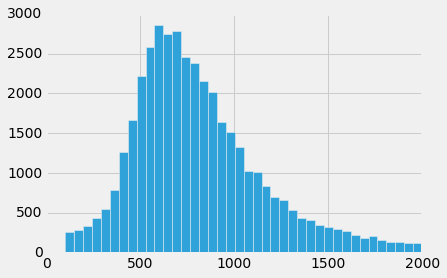

In [13]:
num_beats = np.array(list(map(lambda x: len(x[feat_name]), data)))
plt.hist(num_beats[num_beats<2000], 40);

In [ ]:
for cls in classes_to_data:
    loud_vals = list(map(lambda x: list(x[feat_name]), classes_to_data[cls][:min_len]))
    loud_vals = np.array([item for sublist in loud_vals for item in sublist])
    print(cls)
    plt.xlim(xmin=0.0, xmax=1.1)
    plt.hist(loud_vals[loud_vals<2.0], 40);
    plt.show()

0.0556137747376 0.375884499934


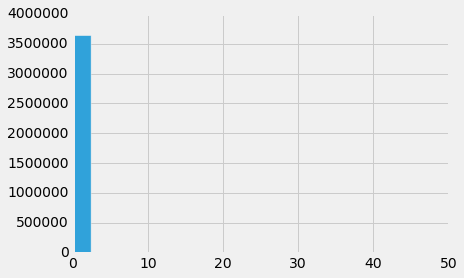

In [23]:
loud_vals = list(map(lambda x: list(x[feat_name]), classes_to_data[cls][:min_len]))
loud_vals = [item for sublist in loud_vals for item in sublist]
plt.hist(loud_vals, 20)
print(np.mean(loud_vals), np.var(loud_vals))

0


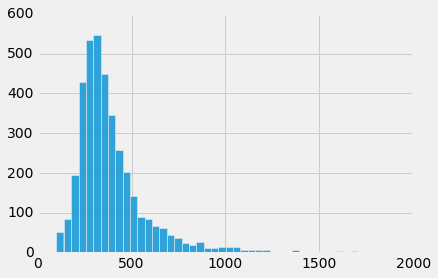

1


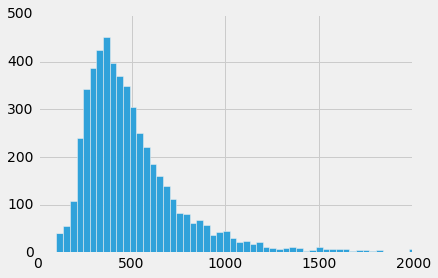

2


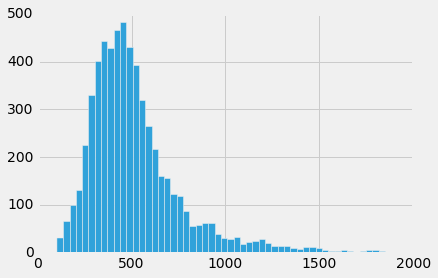

3


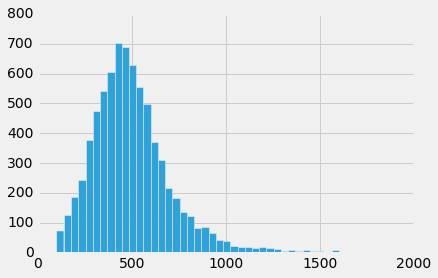

4


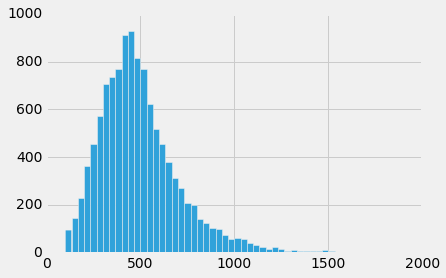

5


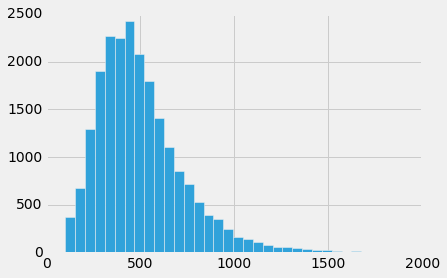

6


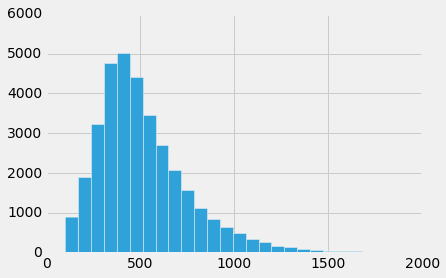

7


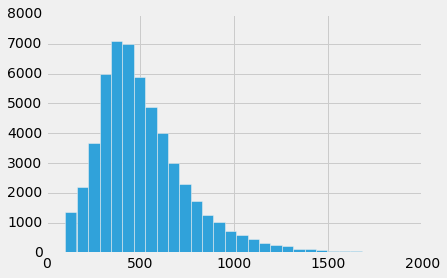

8


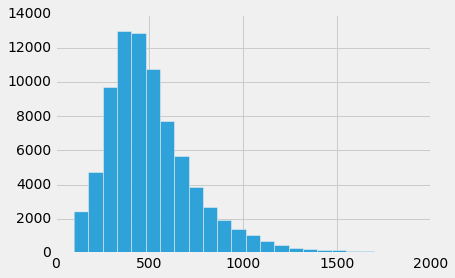

9


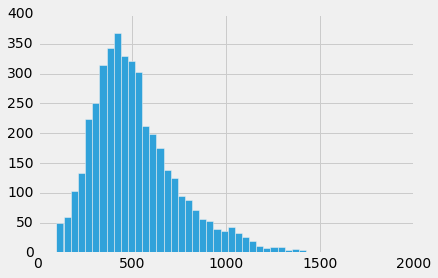

In [14]:
for cls in classes_to_data:
    num_beats = list(map(lambda x: len(x[feat_name]), classes_to_data[cls]))
    print(cls)
    plt.xlim(xmax=2000)
    plt.hist(num_beats, 100);
    plt.show()

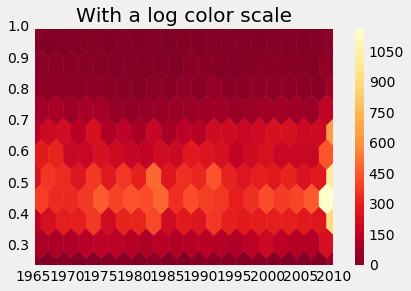

In [24]:
X = list(map(lambda x: x['year'], uniform_data))
Y = np.array(list(map(lambda x: np.median(x['beats_gap'], axis=0), uniform_data)))
#plt.scatter(X, Y)
xmin = min(X)
ymin = min(Y)
xmax = max(X)
ymax = max(Y)

plt.hexbin(X, Y, bins=None, gridsize=(20, 20), cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
plt.ylim(ymax=1.0)

plt.show()

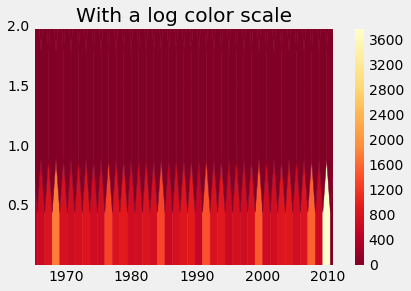

In [26]:
X = list(map(lambda x: x['year'], uniform_data))
Y = np.array(list(map(lambda x: np.var(x['beats_gap'], axis=0), uniform_data)))*100

xmin = min(X)
ymin = min(Y)
xmax = max(X)
ymax = max(Y)

plt.hexbin(X, Y, bins=None, gridsize=40, cmap=plt.cm.YlOrRd_r)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("With a log color scale")
cb = plt.colorbar()
plt.ylim(ymax=2)

plt.show()

In [ ]:
for perc in np.linspace(0,100,11):
    print(perc)
    X = list(map(lambda x: x['year'], uniform_data))
    Y = list(map(lambda x: np.percentile(x['beats_gap'], perc), uniform_data))
    xmin = min(X)
    ymin = min(Y)
    xmax = max(X)
    ymax = max(Y)

    plt.hexbin(X, Y, bins=None, gridsize=20, cmap=plt.cm.YlOrRd_r)
    plt.axis([xmin, xmax, ymin, ymax])
    plt.title("With a log color scale")
    cb = plt.colorbar()
    plt.ylim(ymax=1.0)

    plt.show()